## Exercise 5 :  KNN and SVM classification (deadline: 26 March 2024)
## Note: please complete the tasks in this file, and rename the file as "Exercise_05_FirstName_LastName.ipynb"
## Total points: 10 + 1 bonus

---
#### What to expect from the exercise
Today you will be using the K-Nearest Neighbor (KNN) and Support Vector Classification (SVC) algorithms to classify which kind a given wine belongs to, depending on some features.
A crucial part in data science is understanding how well your model performs by quantifying model performance and uncertainty. You'll learn how to perform *cross-validation* with sklearn's **model_selection.KFold** and **model_selection.cross_val_score**.

After this session, you will be able to:
* use sklearn.neighbors.KNeighborsClassifier for general classification tasks and know how to find the optimal # of neighbors
* use sklearn.svm.SVC for general classification tasks and know how to use different kernels
* explain how cross-validation work and what is used for
* use cross-validation to quantify model uncertainty and performance

*keywords*: classifiers: K-Nearest Neighbour (KNN), Support Vector Machines &mdash; resampling methods: cross-validation



In [2]:
#!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, neighbors, svm, model_selection, metrics)

# If you want to set a context for your plots using seaborn:
sns.set_context('talk')

# to show the plots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


---
### K-Nearest Neighbor (KNN) classifier

KNN is a supervised machine learning algorithm that can be used for classification (data with discerete labels) or regression (data with continous labels). The basic principle behind the KNN classifier is very intituive: for a given point, find a pre-defined (k) number of training samples that are closest to that point, and predict the label from these.

We'll start off by loading the wine dataset just like last week and re-viewing how you can use seaborn to create a pairplot.

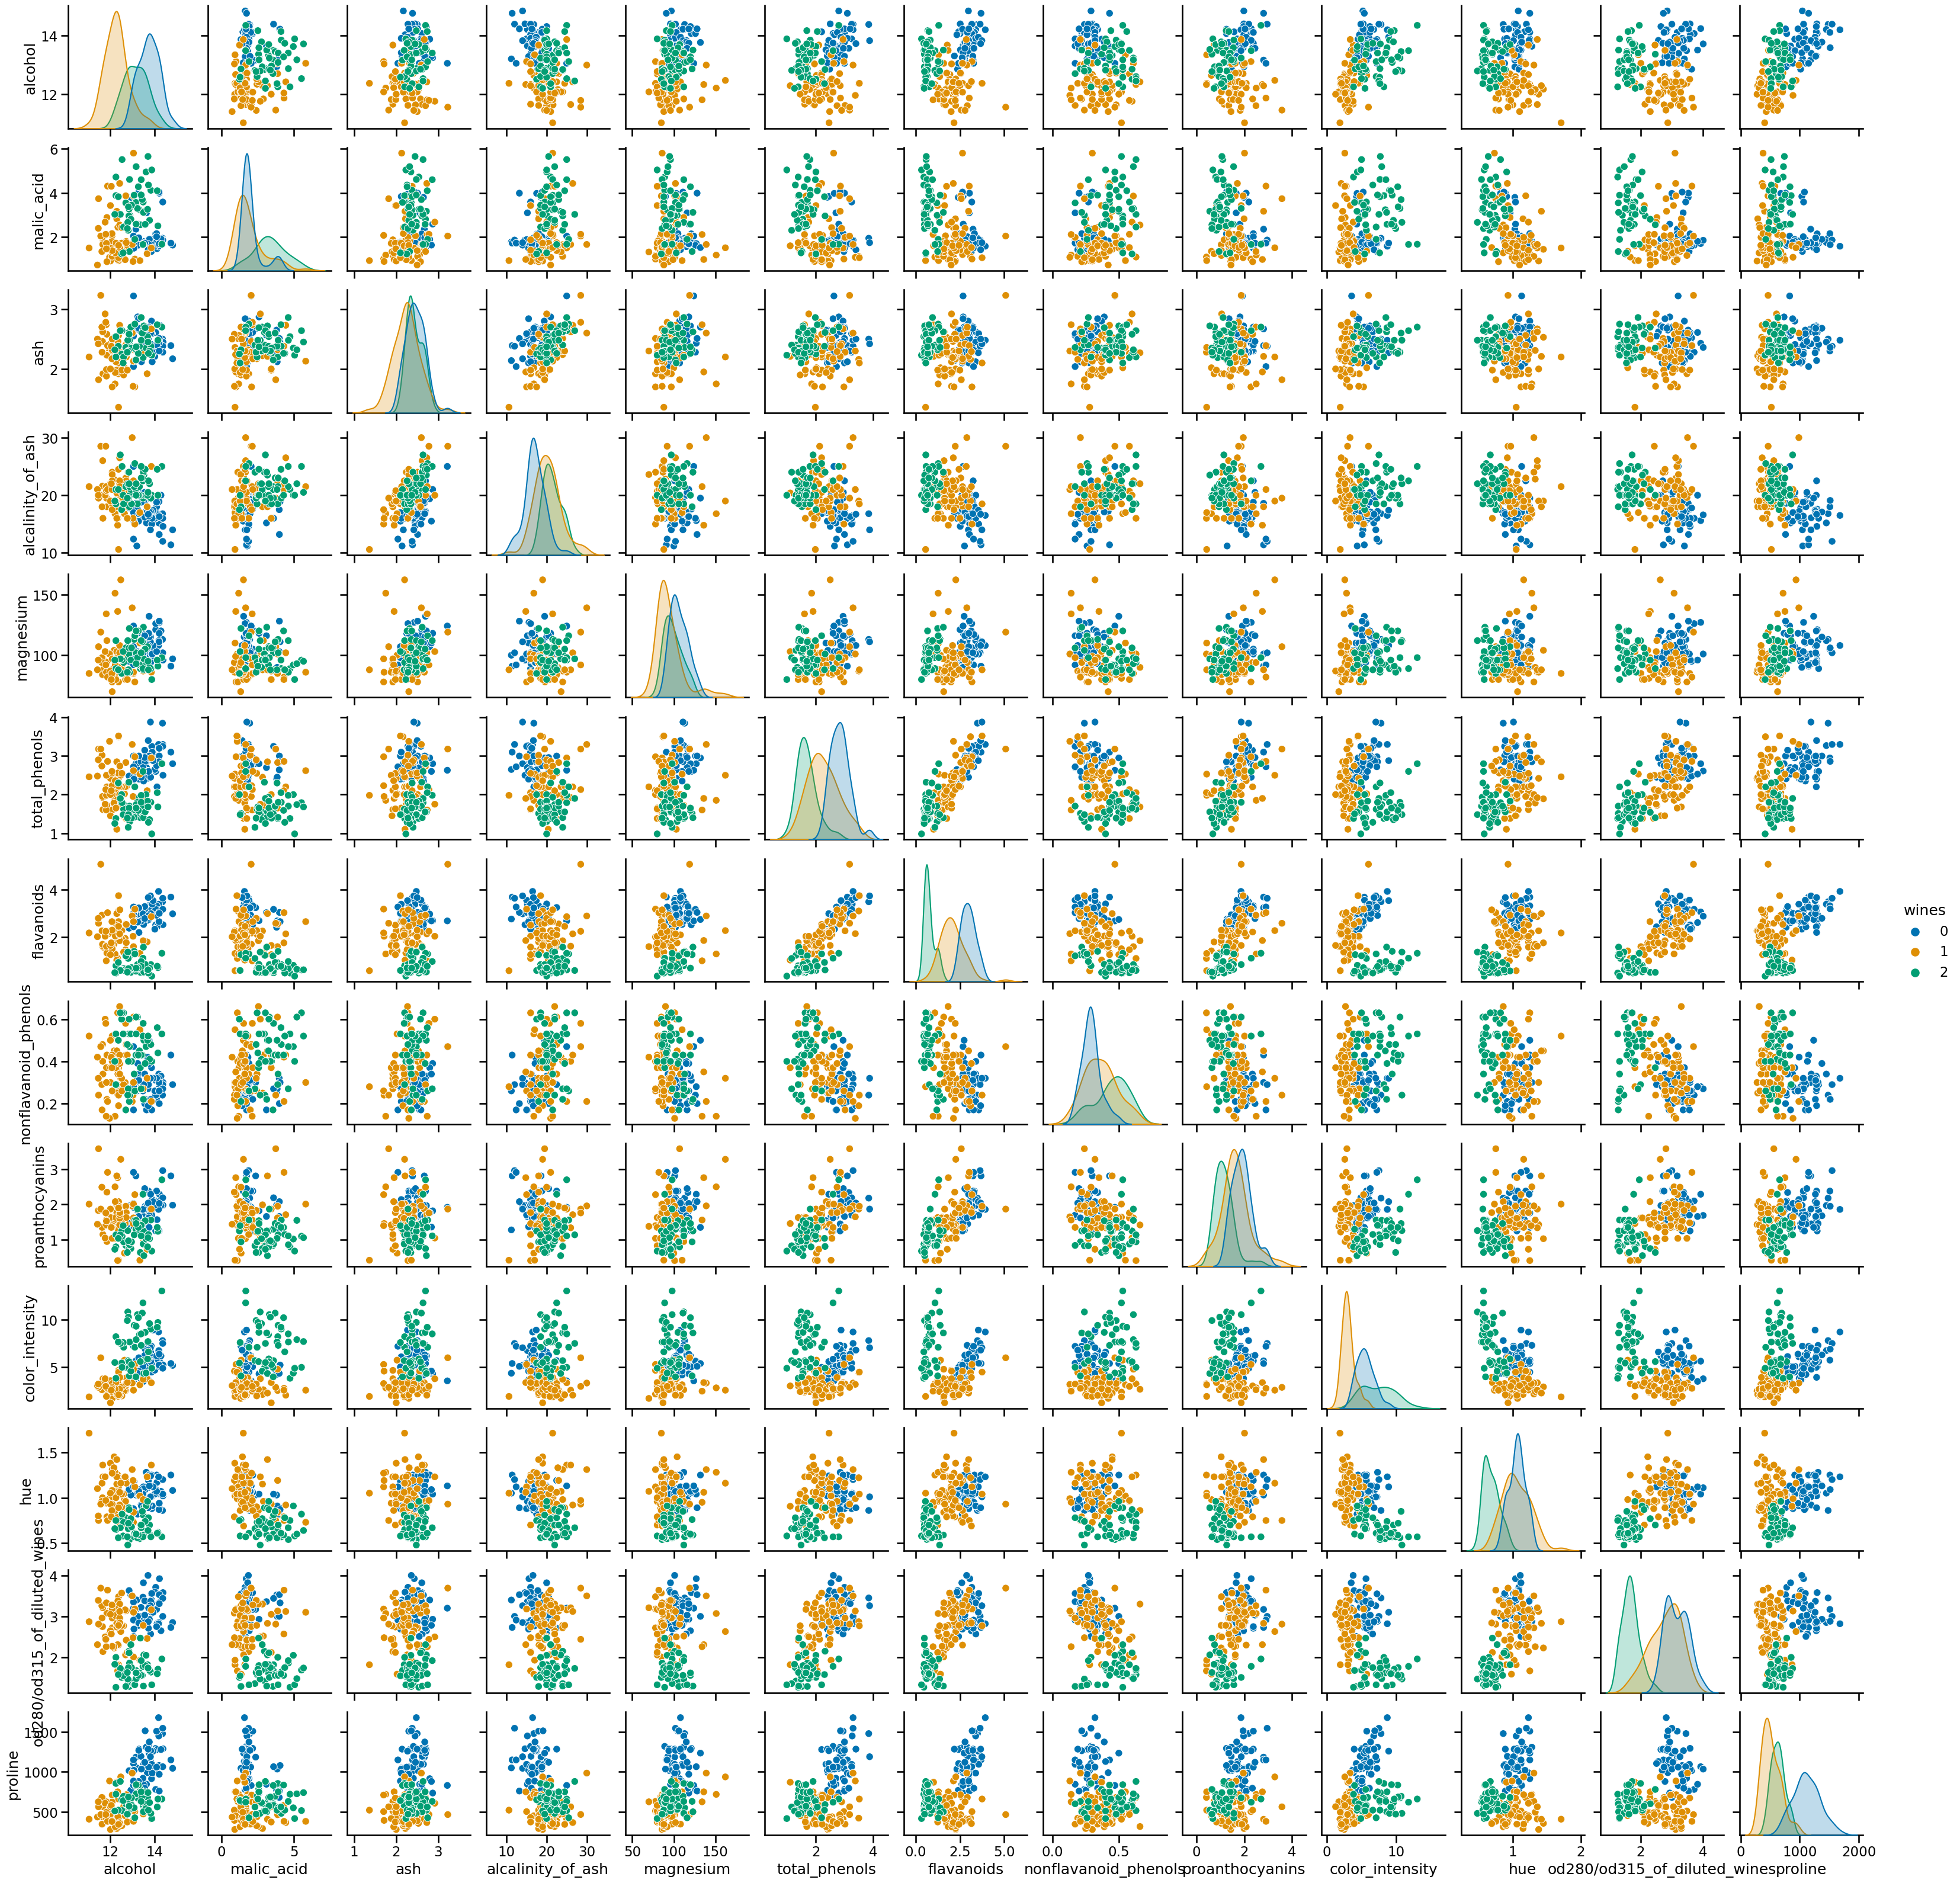

In [9]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
cols = [name for name in wine.feature_names]
df.columns = cols
df['wines'] = wine.target
g = sns.pairplot(df, vars=cols, hue='wines', palette='colorblind')

In [10]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wines  
0                            3.92   1065.0      0  
1                            3.40   1050.0      0  
2                            3.17   1185.0      0  
3                            3.45   1480.0      0  
4                            2.93    735.0      0  
..                            ...      ...    ...  
173                          1.74    740.0      2  
174                          1.56    750.0      2  
175                          1.56    835.0      2  
176                          1.62    840.0      2  
177                          1.60    560.0      2  

[178 rows x 14 columns]

#### Getting started with KNN ####
In your every-day life as a data scientist, it's completely normal to have to browse the internet for how to solve problems
or to read docs on how to use certain modules. Let's have a look at the *neighbors.KNeighborsClassifier* documentation and
see if we can understand how to use it.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here is one example how to use sklearn.neighbors.KNeighborsClassifier

Test set accuracy: 1.00


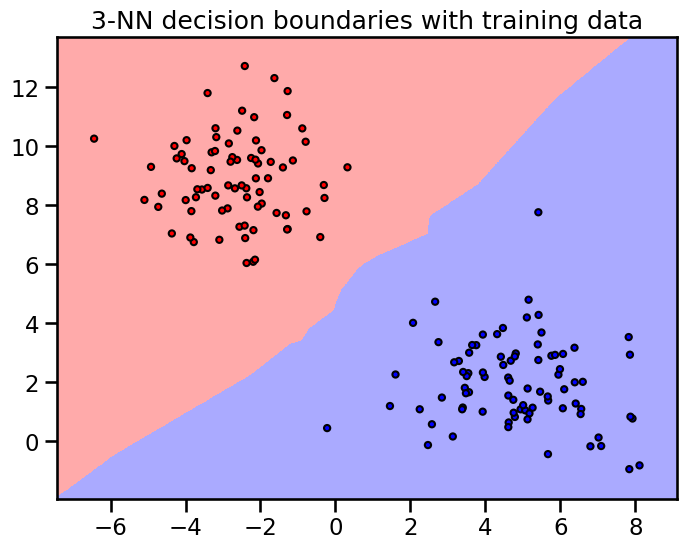

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

# Plotting the decision boundary
def plot_decision_boundaries(X, y, model, title="Decision boundaries"):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    h = .02  # step size in the mesh
    # Create a mesh of points to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Plotting the decision boundary for the training set
plot_decision_boundaries(X_train, y_train, knn, title="3-NN decision boundaries with training data")

# Evaluate and print the accuracy
accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

In [17]:
X

array([[ 2.24823735,  1.07410715],
       [ 5.12395668,  0.73232327],
       [ 4.6766441 ,  2.72016712],
       [-4.10265319,  9.72467477],
       [ 5.06136664,  1.0391204 ],
       [ 7.85579497,  2.92404822],
       [ 4.81015485,  2.9663657 ],
       [ 3.92746087,  0.99317584],
       [-3.17897005, 10.29888432],
       [ 5.92636827,  1.73326189],
       [-2.41885231, 12.7091493 ],
       [ 5.98927865,  2.43411897],
       [-0.40500616,  6.91150953],
       [ 5.46052491,  1.66988071],
       [-0.22202217,  0.43658822],
       [ 0.28946414,  9.72503551],
       [ 4.97601756,  1.99205829],
       [ 3.13085276,  0.15188676],
       [ 3.91183351,  2.09598089],
       [ 3.54432889,  2.29785757],
       [ 5.66280829,  1.50776955],
       [ 5.41243174,  2.74384861],
       [-0.31072447,  8.67562168],
       [ 3.39638632,  1.13289812],
       [-2.02307167,  8.43666271],
       [-3.32577171,  9.18067001],
       [ 5.39735975,  3.27180248],
       [-1.27538025,  7.18302065],
       [ 3.29225683,

---
### Exercise 5.1 (total: 4 points):
Use the KNN classifier *neighbors.KNeighborsClassifier* to predict the wine kind by using the two features "alcohol" and "od280/od315_of_diluted_wines".


- **5.1.1 (1 point)** Choose the columns "alcohol" and "od280/od315_of_diluted_wines" as predictors and "wine.target" as outcome. Split your data into training and test sets. You could, for instance, make use of the function *model_selection.train_test_split* (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [31]:
X = df[["alcohol", "od280/od315_of_diluted_wines"]].values
y = df["wines"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- **5.1.2 (1 point)** Create a predictor object with 3 as number of neighbours and **fit** the model **to your** (**training**) **data**. 

In [32]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- **5.1.3 (1 point)** Create a scatter-plot of your predictions and compare to the real species. (*Hint: use different markers for the predicted/true species.*) Produce this plot for predictions corresponding to both your training and test data (i.e., 2 plots in total).

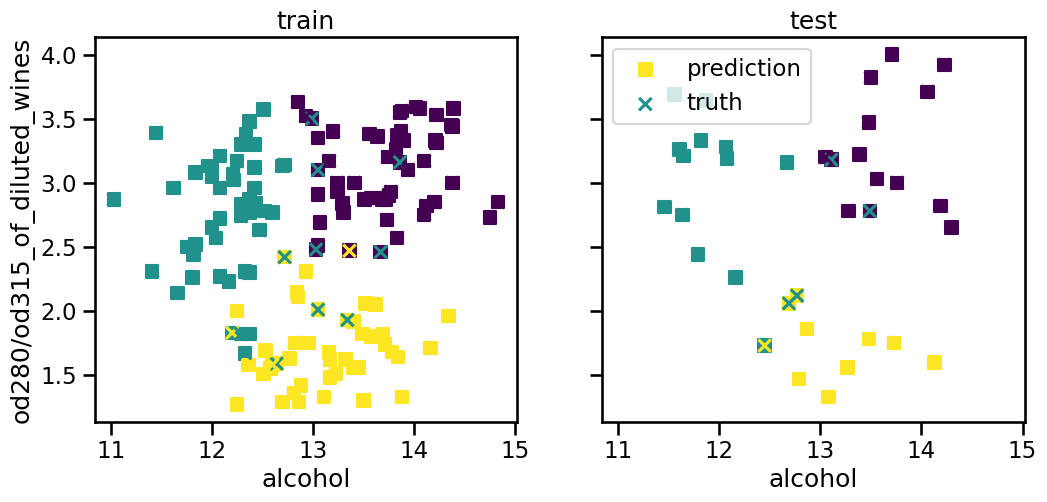

In [42]:

fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True, sharex=True)
for ax, x_i, y_i, title in zip(axes, [X_train, X_test], [y_train, y_test], ['train', 'test']):
    x_i = np.asarray(x_i)
    y_pred = knn.predict(x_i)
    x1, x2 = x_i[:,0], x_i[:,1]
    ax.scatter(x1, x2, c=y_pred, marker='s', label='prediction')
    ax.scatter(x1, x2, c=y_i, marker='x', label='truth')
    ax.set_xlabel('alcohol'); ax.set_ylabel('od280/od315_of_diluted_wines')
    ax.set_title(title)
axes[1].set_ylabel('')
axes[1].legend()

- **5.1.4 (1 point)** Compute the mean accuracy of your model when predicting test data outcomes.

In [43]:
accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Test set accuracy: 0.86


---
### Decision boundaries
If we want to be fancy (we do), you can also plot the decision boundaries like so:

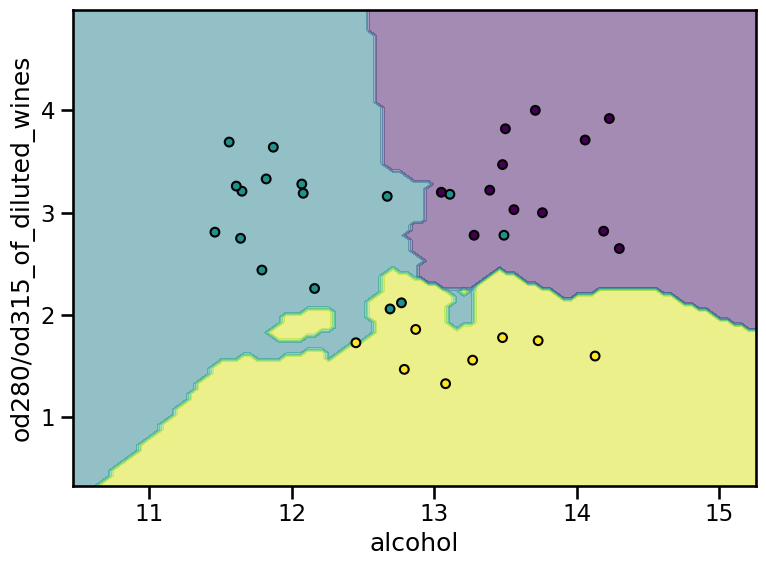

In [44]:
X, y = np.asarray(X_test), np.asarray(y_test)

# draw decision boundaries as coloured regions
h = .05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.contourf(xx, yy, Z, alpha=.5)

# scatter plot of the actual classes
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=40)
ax.set_xlabel('alcohol')
ax.set_ylabel('od280/od315_of_diluted_wines')
fig.tight_layout()

---
### Exercise 5.2 (total: 4 points)
The KNN algorithm requires a free parameter, namely the number of neighbors $k$. Find the optimal choice for the number of neighbors. Then use cross validation to better estimate the accuracy of the model.


- **5.2.1 (1 point)** Compute both the training and test accuracy of different KNN classifiers specifying different  numbers of neighbours from $k=1$ to $k=20$.

- **5.2.2 (1 point)** Plot both the training and test accuracy as a function of the number of neighbours.

- **5.2.3 (1 point)** Split the dataset with Leave-One-Out-Strategy (do not reshuffle the data), then use the following function to visualize how you splitted the datset. (hint: you might want to check `model_selection.LeaveOneOut()`)



In [ ]:
def plot_loov_indices(loov, X, y, ax, lw=10):
    """Create a sample plot for indices of a leave-one-out validation object."""
    
    # The number of splits is equal to the number of samples in leave-one-out
    n_splits = len(X)
    
    # Generate the training/testing visualizations for each LOOV split
    for ii, (train_index, test_index) in enumerate(loov.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[test_index] = 1
        indices[train_index] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=plt.cm.coolwarm,
            vmin=-0.2,
            vmax=1.2,
        )

    # Setting the y-axis to better visualize the leave-one-out splits
    ax.set_ylim(-1, n_splits)
    
    # Adding labels for clarity
    ax.set_xlabel("Sample index")
    ax.set_ylabel("Iteration")
    ax.set_title("Leave-One-Out Validation (LOOV) Indices")

    return ax

- **5.2.4 (1 points)**  Select a good number of neighbors from your analysis on k done in the previous task and then study the behavior of accuracy through leave-one-out validation. Print the scores for all the validation rounds and then the mean of the scores. (hint: you might want to check `model_selection.cross_val_score()`)

---
### Support Vector Machines

Support Vector machines (SVMs) are supvervised learning methods that can be used for classification, regression and outliers detection. A major advantage of SVMs is that they can be very effective in high-dimensional spaces. SVM work by constructing a hyper-plane or a set of hyper-planes in a high (or infinite) dimensional space that can be used for these tasks. The general idea behind SVMs is that a good separation is achieved by the hyper-plane if it has the largest possible distance to the nearest training data points.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

For the next exercise, you're going to repeat the classification task from above, but this time you're going to use a support vector classification algorithm.

In [ ]:
def decision_boundary(X, y, classifier):
    """ Plots decision boundaries given input features
    X, input target y and a classifier.

    Args:
        X: features
        y: target 
        classifier: sklearn KNeighborsClassifier or SVC object (fitted to data!)
    """
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)
    if not (isinstance(classifier, svm._classes.SVC)
            or isinstance(classifier, neighbors._classification.KNeighborsClassifier)):
        print('classifier needs to be a SVC or KNN object')
        return
    
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolor='k', s=30)
    fig.tight_layout()
    print(f'mean accuracy: {classifier.score(X, y):.2f}', flush=True)
    plt.show()
    return


---
### Exercise 5.3 (total: 2 points + bonus):
- **5.3.1 (1 point)** Use the SVM classifier *svm.SVC* to predict the wine type by using the same two features as before. For this exercise, use all data, without splitting them into train/test sets. Fit your model to the data and provide the model score.

- **5.3.2 (1 point)** Use the pre-defined function from below and create decision boundary plots with the KNN and SVC algorithms and compare the results visually as well as their respective model scores. *Note: you have to initiate and fit the classifier object before you can hand it to the function!*

---
### Bonus (1 point)
Try different kernels in the SVM (linear, poly, rbf, and sigmoid), plot the decision boundaries and evaluate the model scores.